In [61]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [62]:
%run ../cow.py

# Short Blocklength Test

In [11]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
# tx_SNR_range = arange(30, -10*log10(protocol_target), 0.01)
protocolbit = 4200
start_node, end_node = 2, 6
user_range = arange(start_node, end_node, 1)

In [4]:
filepath_down = "../data_tables/short_block_test/default/down/n"
filepath_up = "../data_tables/short_block_test/default/up/n"

## Old Optimize 1

In [33]:
%%time
%run ../optimize_pkg.py
optimize_1_data = zeros((5, 5))
tx_SNR_range = arange(30, 60, 0.1)
for N in user_range:
    optimize_1_data[N-1] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 103 ms, sys: 5.04 ms, total: 108 ms
Wall time: 120 ms


In [34]:
print optimize_1_data

[[    0.       0.       0.       0.       0.  ]
 [   51.       3.55  1400.    1400.    1400.  ]
 [   38.7      5.31  1400.    1400.    1400.  ]
 [   34.5      8.29  1400.    1400.    1400.  ]
 [   33.      11.18  1400.    1400.    1400.  ]]


## New Optimize 1

In [15]:
%%time
%run ../optimize_pkg_2.py
N = 5
tx_SNR_range = arange(30, 40, 0.01)
optimize_1_n5_v2 = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
print optimize_1_n5_v2

Version 2
(30.19000000000003, 39.990000000001558, 11.18, 10.91, array(9.556022639434643e-11), array(9.412870482624644e-11), array(9.556022639434643e-11))
CPU times: user 8.85 s, sys: 40.9 ms, total: 8.89 s
Wall time: 8.99 s


In [32]:
%%time
%run ../optimize_pkg_2.py
optimize_1_data_2 = zeros((5, 7))
tx_SNR_range = arange(27, 60, 0.1)
for N in user_range[::-1]:
    optimize_1_data_2[N-1] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    print N, optimize_1_data_2[N-1]

5 [  2.92000000e+01   5.51000000e+01   1.11800000e+01   1.09100000e+01
   9.55602264e-11   9.41287048e-11   9.55602264e-11]
4 [  2.76000000e+01   5.43000000e+01   5.05000000e+00   8.29000000e+00
   9.82982445e-11   9.50248074e-11   9.82982445e-11]
3 [  3.34000000e+01   5.69000000e+01   3.34000000e+00   5.31000000e+00
   9.57194967e-11   8.67846335e-11   9.57194967e-11]
2 [  4.78000000e+01   5.94000000e+01   2.44000000e+00   3.55000000e+00
   9.48693257e-11   8.60089696e-11   9.48693257e-11]
CPU times: user 16.7 s, sys: 113 ms, total: 16.8 s
Wall time: 17.1 s


## Comparisons

In [22]:
old_fade = 10**((8.29 - 34.44)/10)
print old_fade
new_fade_down = 10**((5.05 - 30)/10)
new_fade_up = 10**((8.29 - 36.55)/10)
print new_fade_down, new_fade_up

0.00242661009508
0.00319889510969 0.00149279440958


In [58]:
old_fades = zeros((5, 1))
new_fade_downs = zeros((5, 1))
new_fade_ups = zeros((5, 1))

for N in user_range:
    row = optimize_1_data[N-1]
    old_fade = 10**((row[1] - row[0])/10)
    old_fades[N-1] = row[1] - row[0]
    row2 = optimize_1_data_2[N-1]
    new_fade_down = 10**((row2[2] - row2[0])/10)
    new_fade_downs[N-1] = row2[2] - row2[0]
    new_fade_up = 10**((row2[3] - row2[1])/10)
    new_fade_ups[N-1] = row2[3] - row2[1]
    print "N", N, "old fade", old_fade
    print "new fade", "downlink", new_fade_down, "uplink", new_fade_up
    print "\n"

N 2 old fade 1.79887091513e-05
new fade downlink 2.91071711807e-05 uplink 2.60015956316e-06


N 3 old fade 0.000458141886715
new fade downlink 0.000986279485631 uplink 6.93425806017e-06


N 4 old fade 0.00239331575641
new fade downlink 0.0055590425727 uplink 2.50610925303e-05


N 5 old fade 0.00657657837355
new fade downlink 0.015776112697 uplink 3.81065823394e-05




In [46]:
print "old transmit SNR         ", optimize_1_data[:,0]
print "new downlink transmit SNR", optimize_1_data_2[:,0]
print "new uplink transmit SNR  ", optimize_1_data_2[:,1]

print ""

print "old receiver SNR         ", optimize_1_data[:,1]
print "new downlink receiver SNR", optimize_1_data_2[:,2]
print "new uplink receiver SNR  ", optimize_1_data_2[:,3]

old transmit SNR          [  0.   51.   38.7  34.5  33. ]
new downlink transmit SNR [  0.   47.8  33.4  27.6  29.2]
new uplink transmit SNR   [  0.   59.4  56.9  54.3  55.1]

old receiver SNR          [  0.     3.55   5.31   8.29  11.18]
new downlink receiver SNR [  0.     2.44   3.34   5.05  11.18]
new uplink receiver SNR   [  0.     3.55   5.31   8.29  10.91]


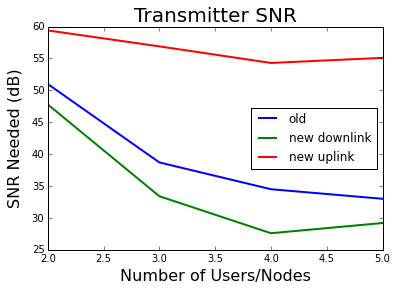

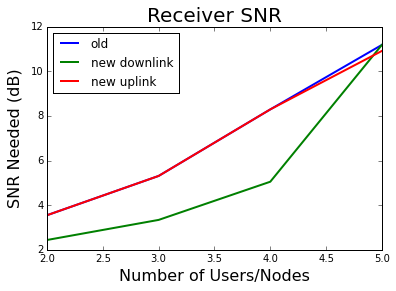

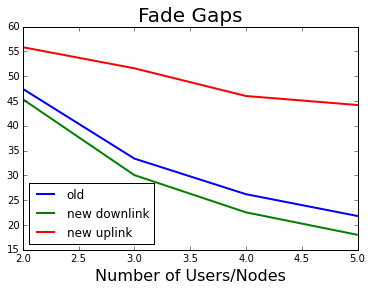

In [75]:
figure()
plot(user_range, optimize_1_data[1:,0], lw=2.0, label='old')
plot(user_range, optimize_1_data_2[1:,0], lw=2.0, label='new downlink')
plot(user_range, optimize_1_data_2[1:,1], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR', fontsize=20)

figure()
plot(user_range, optimize_1_data[1:,1], lw=2.0, label='old')
plot(user_range, optimize_1_data_2[1:,2], lw=2.0, label='new downlink')
plot(user_range, optimize_1_data_2[1:,3], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Receiver SNR', fontsize=20)

figure()
plot(user_range, optimize_1_data[1:,0]-optimize_1_data[1:,1], lw=2.0, label='old')
plot(user_range, optimize_1_data_2[1:,0]-optimize_1_data_2[1:,2], lw=2.0, label='new downlink')
plot(user_range, optimize_1_data_2[1:,1]-optimize_1_data_2[1:,3], lw=2.0, label='new uplink')
# plot(user_range, old_fades[1:], lw=2.0, label='old')
# plot(user_range, new_fade_downs[1:], lw=2.0, label='new downlink')
# plot(user_range, new_fade_ups[1:], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
# ylabel('Fade Gaps', fontsize=16, labelpad=10)
legend(loc=0)
title('Fade Gaps', fontsize=20)
# The more negative the fade gap, the less likely the link will fail due to fade (stricter)

## Old Optimize 3

In [69]:
%%time
%run ../optimize_pkg.py
optimize_3_data = zeros((5, 5))
rx_SNR_start = 0
tx_SNR_range = arange(25, 60, 1)
for N in user_range:
    optimize_3_data[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    
print optimize_3_data

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  5.10000000e+01   2.50000000e+00   3.25788384e-11   2.76348845e-06
    2.76348845e-06]
 [  3.90000000e+01   4.30000000e+00   8.48370245e-18   2.35494936e-07
    2.35494936e-07]
 [  3.40000000e+01   7.50000000e+00   7.81707275e-27   1.20134795e-08
    1.20134795e-08]
 [  3.30000000e+01   1.00000000e+01   6.23410084e-08   1.22792898e-08
    1.22792898e-08]]
CPU times: user 4.16 s, sys: 38.2 ms, total: 4.2 s
Wall time: 4.28 s


## New Optimize 3

This is different from the comparisons. I ported the work to 160824, but decided to preserve the PDF. For the rest of the PDF, transmit powers are allowed to vary along with receiver powers.

In [78]:
%%time
%run ../optimize_pkg_2.py
optimize_3_data_2 = zeros((5, 7))
tx_SNR_range = arange(28, 60, 1)
for N in user_range[::-1]:
    optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
    print N, optimize_3_data_2[N-1]

5 [  3.00000000e+01   7.00000000e+00   7.00000000e+00   1.10000000e+01
   2.47300190e-03   4.87590826e-04   5.59116087e-11]
4 [  3.20000000e+01   4.00000000e+00   5.00000000e+00   8.00000000e+00
   3.13583564e-06   5.62737665e-04   6.31821039e-10]
3 [  3.70000000e+01   3.00000000e+00   4.00000000e+00   5.00000000e+00
   9.37341948e-09   1.70239658e-06   1.27944396e-09]
2 [  5.00000000e+01   2.00000000e+00   3.00000000e+00   3.00000000e+00
   5.54012442e-08   3.11859133e-08   3.11859133e-08]
CPU times: user 4min 37s, sys: 1.17 s, total: 4min 38s
Wall time: 4min 41s


## Comparisons

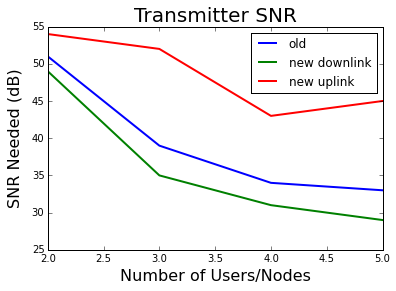

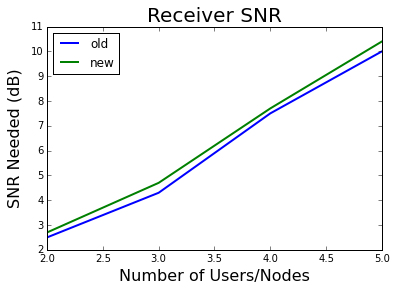

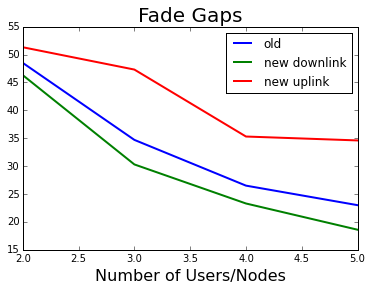

In [74]:
figure()
plot(user_range, optimize_3_data[1:,0], lw=2.0, label='old')
plot(user_range, optimize_3_data_2[1:,0], lw=2.0, label='new downlink')
plot(user_range, optimize_3_data_2[1:,1], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR', fontsize=20)

figure()
plot(user_range, optimize_3_data[1:,1], lw=2.0, label='old')
plot(user_range, optimize_3_data_2[1:,2], lw=2.0, label='new')
# plot(user_range, optimize_3_data_2[1:,3], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Receiver SNR', fontsize=20)

figure()
plot(user_range, optimize_3_data[1:,0]-optimize_3_data[1:,1], lw=2.0, label='old')
plot(user_range, optimize_3_data_2[1:,0]-optimize_3_data_2[1:,2], lw=2.0, label='new downlink')
plot(user_range, optimize_3_data_2[1:,1]-optimize_3_data_2[1:,3], lw=2.0, label='new uplink')
xlabel('Number of Users/Nodes', fontsize=16)
# ylabel('Fade Gaps', fontsize=16, labelpad=10)
legend(loc=0)
title('Fade Gaps', fontsize=20)
# The more negative the fade gap, the less likely the link will fail due to fade (stricter)

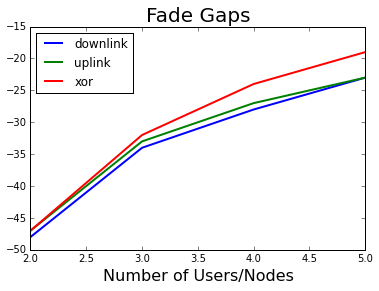

In [80]:
plot(user_range, optimize_3_data_2[1:,1]-optimize_3_data_2[1:,0], lw=2.0, label='downlink')
plot(user_range, optimize_3_data_2[1:,2]-optimize_3_data_2[1:,0], lw=2.0, label='uplink')
plot(user_range, optimize_3_data_2[1:,3]-optimize_3_data_2[1:,0], lw=2.0, label='xor')
xlabel('Number of Users/Nodes', fontsize=16)
legend(loc=0)
title('Fade Gaps', fontsize=20)